# Manifold example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')   # path to polaris module

import polaris.SolarSystemConstants as sscs
import polaris.Keplerian as kepl
import polaris.Propagator as prop
import polaris.R3BP as r3bp

In [3]:
param_earth_moon = r3bp.get_cr3bp_param('399','301')   # NAIF ID's '399': Earth, '301': Moon
lp = r3bp.lagrangePoints(param_earth_moon.mu)
param_earth_moon.mu

0.012150584269940354

In [4]:
stateP = np.array([1.0836947694764694, 0.0, 0.06378527023677243, 0.0, 0.2783751354704641, 0.0])
period = 3.315677359772673

In [17]:
tf_manif = 12.5
manifpls, manifmin = r3bp.get_manifold(
    param_earth_moon,
    stateP,
    period,
    tf_manif,
    num_branches=50,
    eps=1e-8,
    verbose=True,
)

monodromy = [[  470.48198037    35.19855572   231.77837725    74.98655833
    118.37450563    25.58416299]
 [ -747.57264999   -54.8894238   -367.72202715  -118.37450563
   -188.45544428   -40.55009128]
 [  160.60417791    11.60973407    80.04619286    25.58416299
     40.55009128     8.52873059]
 [ 1469.43697917   109.44277063   725.06614804   233.73296911
    370.66176144    79.50399535]
 [-1160.1855789    -86.12217841  -572.2878069   -185.17167237
   -291.63843504   -62.77806003]
 [ 1460.51020237   108.73105243   720.34053509   231.77837725
    367.72202716    80.04619286]]
yu0 = [-0.18549589  0.29395913 -0.06329668 -0.57795471  0.45808031 -0.5755898 ]
ys0 = [ 0.18549589  0.29395913  0.06329668 -0.57795471 -0.45808031 -0.5755898 ]
eps = 1e-08


Manifold:   0%|          | 0/50 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


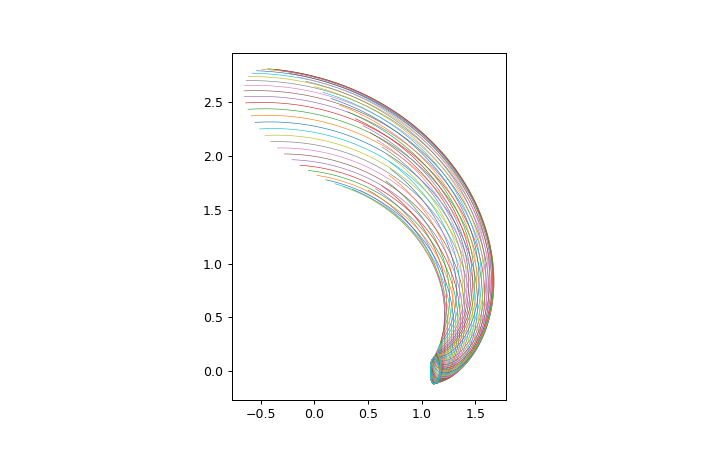

In [19]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

for branch in manifpls.branches:
    ax.plot(branch.propout.xs, branch.propout.ys, linewidth=0.5)
ax.set_aspect("equal")
plt.show()